In [26]:
import pandas as pd

In [27]:
url = 'universalbank.csv'
df = pd.read_csv(url)

In [31]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,19,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,34,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12,2,0,0,0,0,0,1


In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Applying data preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['CCAvg'] = label_encoder.fit_transform(df['CCAvg'])

#### Splitting data into test and train

In [47]:
X = df.drop('CreditCard', axis=1)
y = df['CreditCard']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### applying model

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Predicting the X_test

In [51]:
y_pred = classifier.predict(X_test)

#### check the r^2 score

In [52]:
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y_test, y_pred))

R^2 :  -0.23049409822593803


In [62]:
y_pred.tolist().count(1),y_test.tolist().count(1)

(101, 467)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


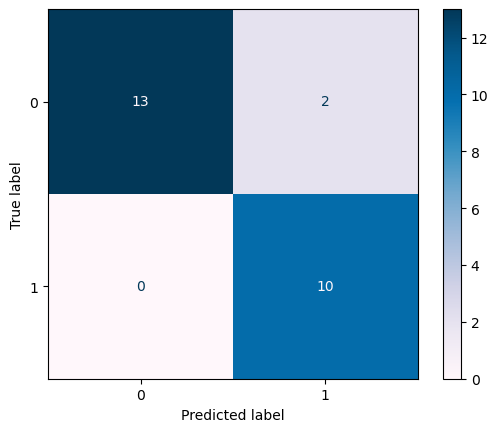

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap='PuBu')  
plt.show()

In [69]:
plot_confusion_matrix?

Signature:
plot_confusion_matrix(
    estimator,
    X,
    y_true,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format=None,
    cmap='viridis',
    ax=None,
    colorbar=True,
)
Docstring:
DEPRECATED: Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

Plot Confusion Matrix.

`plot_confusion_matrix` is deprecated in 1.0 and will be removed in
1.2. Use one of the following class methods:
:func:`~sklearn.metrics.ConfusionMatrixDisplay.from_predictions` or
:func:`~sklearn.metrics.ConfusionMatrixDisplay.from_estimator`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
estimator : estimator instance
    Fitted classifier or a fitted :class:`~sklearn.pipeline.Pipeline`
    in which the last estimator is 